En este ejemplo, creará un script de Python para visualizar el clima de más de 500 ciudades en todo el mundo a diferentes distancias del ecuador. Para lograr esto, utilizará una biblioteca Python simple , la API de OpenWeatherMap y un poco de sentido común para crear un modelo representativo del clima en las ciudades del mundo.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from datetime import datetime
from scipy.stats import linregress
from pprint import pprint

# import API key from config file (python)
from config import api_key_ow

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities

### GENERATE CITIES LIST

In [2]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

# REGRESAR A 1500. SE TOMAN 150 PARA TESTEAR
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
pprint (cities)

['praya',
 'namibe',
 'bluff',
 'kapaa',
 'veraval',
 'bonavista',
 'lorengau',
 'campbell river',
 'georgiyevka',
 'nara',
 'iqaluit',
 'cherskiy',
 'upernavik',
 'bredasdorp',
 'yeppoon',
 'tasiilaq',
 'beloha',
 'sao filipe',
 'new norfolk',
 'cape town',
 'hobart',
 'tuatapere',
 'luderitz',
 'rikitea',
 'hobyo',
 'taolanaro',
 'nantucket',
 'talnakh',
 'sioux lookout',
 'hebi',
 'mataura',
 'punta arenas',
 'atuona',
 'avarua',
 'isangel',
 'barentsburg',
 'ribeira grande',
 'severo-kurilsk',
 'ushtobe',
 'port alfred',
 'saldanha',
 'port lincoln',
 'vaini',
 'qaanaaq',
 'ushuaia',
 'tuktoyaktuk',
 'illoqqortoormiut',
 'saint-philippe',
 'shubarshi',
 'hilo',
 'airai',
 'mashhad',
 'mackay',
 'victor harbor',
 'hithadhoo',
 'albany',
 'lavrentiya',
 'arona',
 'winnemucca',
 'hervey bay',
 'naze',
 'tonstad',
 'samusu',
 'teknaf',
 'nouadhibou',
 'busselton',
 'port elizabeth',
 'ipixuna',
 'milingimbi',
 'kuche',
 'carnarvon',
 'butaritari',
 'lasa',
 'kenai',
 'cabo san lucas',


In [3]:
cities_df= pd.DataFrame({
    "City":cities,
    "Lat": "",
    "Humidity": "",
    "Wind_Speed": "",
    "Temp_Max": "",
    "Cloudiness": "",
    "Date": "",
    "Lng": ""
})

In [4]:
cities_df.shape

(607, 8)

In [5]:
params= {
    "appid": api_key_ow,
    "units": "Imperial"
}


# use iterrows to iterate through pandas dataframe
for i, row in cities_df.iterrows():

    city= row["City"]
    params["q"]=city
    
    # base url
    base_url= "http://api.openweathermap.org/data/2.5/weather?"
    
    # assemble url and make API request
    print(f"Retrieving results for Index{i}:{city}.")
    response= requests.get(base_url,params).json()
    
    try:
        #city_url= query_url + city
        #response = requests.get(f"{query_url}{city}").json()

        cities_df.loc[i,"Cloudiness"]= response["clouds"]["all"]
        cities_df.loc[i,"Country"]= response["sys"]["country"]
        cities_df.loc[i,"Date"]= response["dt"]
        cities_df.loc[i,"Humidity"]= response["main"]["humidity"]
        cities_df.loc[i,"Lat"]= response["coord"]["lat"]
        cities_df.loc[i,"Lng"]= response["coord"]["lon"]
        cities_df.loc[i,"Temp_Max"]= response["main"]["temp_max"]
        cities_df.loc[i,"Wind_Speed"]= response["wind"]["speed"]
        
        

        print(f"Processing Record {i} | {city}")

    except:
        print(f" City not found. Skipping...")


Retrieving results for Index0:praya.
Processing Record 0 | praya
Retrieving results for Index1:namibe.
Processing Record 1 | namibe
Retrieving results for Index2:bluff.
Processing Record 2 | bluff
Retrieving results for Index3:kapaa.
Processing Record 3 | kapaa
Retrieving results for Index4:veraval.
Processing Record 4 | veraval
Retrieving results for Index5:bonavista.
Processing Record 5 | bonavista
Retrieving results for Index6:lorengau.
Processing Record 6 | lorengau
Retrieving results for Index7:campbell river.
Processing Record 7 | campbell river
Retrieving results for Index8:georgiyevka.
Processing Record 8 | georgiyevka
Retrieving results for Index9:nara.
Processing Record 9 | nara
Retrieving results for Index10:iqaluit.
Processing Record 10 | iqaluit
Retrieving results for Index11:cherskiy.
Processing Record 11 | cherskiy
Retrieving results for Index12:upernavik.
Processing Record 12 | upernavik
Retrieving results for Index13:bredasdorp.
Processing Record 13 | bredasdorp
Retrie

Processing Record 112 | illintsi
Retrieving results for Index113:kisangani.
Processing Record 113 | kisangani
Retrieving results for Index114:uglich.
Processing Record 114 | uglich
Retrieving results for Index115:muros.
Processing Record 115 | muros
Retrieving results for Index116:lima.
Processing Record 116 | lima
Retrieving results for Index117:bethel.
Processing Record 117 | bethel
Retrieving results for Index118:norman wells.
Processing Record 118 | norman wells
Retrieving results for Index119:vila franca do campo.
Processing Record 119 | vila franca do campo
Retrieving results for Index120:te anau.
Processing Record 120 | te anau
Retrieving results for Index121:hermanus.
Processing Record 121 | hermanus
Retrieving results for Index122:nome.
Processing Record 122 | nome
Retrieving results for Index123:nguiu.
 City not found. Skipping...
Retrieving results for Index124:victoria.
Processing Record 124 | victoria
Retrieving results for Index125:meulaboh.
Processing Record 125 | meulab

Processing Record 221 | noumea
Retrieving results for Index222:puerto ayora.
Processing Record 222 | puerto ayora
Retrieving results for Index223:san quintin.
Processing Record 223 | san quintin
Retrieving results for Index224:aden.
Processing Record 224 | aden
Retrieving results for Index225:axim.
Processing Record 225 | axim
Retrieving results for Index226:bilma.
Processing Record 226 | bilma
Retrieving results for Index227:leua.
Processing Record 227 | leua
Retrieving results for Index228:ust-ishim.
Processing Record 228 | ust-ishim
Retrieving results for Index229:dikson.
Processing Record 229 | dikson
Retrieving results for Index230:kysyl-syr.
Processing Record 230 | kysyl-syr
Retrieving results for Index231:fort nelson.
Processing Record 231 | fort nelson
Retrieving results for Index232:amderma.
 City not found. Skipping...
Retrieving results for Index233:kwekwe.
Processing Record 233 | kwekwe
Retrieving results for Index234:port-gentil.
Processing Record 234 | port-gentil
Retriev

Processing Record 331 | cape canaveral
Retrieving results for Index332:maxixe.
Processing Record 332 | maxixe
Retrieving results for Index333:lagoa.
Processing Record 333 | lagoa
Retrieving results for Index334:brae.
Processing Record 334 | brae
Retrieving results for Index335:ciudad bolivar.
Processing Record 335 | ciudad bolivar
Retrieving results for Index336:high level.
Processing Record 336 | high level
Retrieving results for Index337:roma.
Processing Record 337 | roma
Retrieving results for Index338:mount isa.
Processing Record 338 | mount isa
Retrieving results for Index339:goderich.
Processing Record 339 | goderich
Retrieving results for Index340:bengkulu.
Processing Record 340 | bengkulu
Retrieving results for Index341:saint-leu.
Processing Record 341 | saint-leu
Retrieving results for Index342:bamora.
Processing Record 342 | bamora
Retrieving results for Index343:xianyang.
Processing Record 343 | xianyang
Retrieving results for Index344:knesselare.
Processing Record 344 | kne

Processing Record 440 | caravelas
Retrieving results for Index441:tucuman.
Processing Record 441 | tucuman
Retrieving results for Index442:chagda.
 City not found. Skipping...
Retrieving results for Index443:hue.
Processing Record 443 | hue
Retrieving results for Index444:thinadhoo.
Processing Record 444 | thinadhoo
Retrieving results for Index445:xadani.
 City not found. Skipping...
Retrieving results for Index446:lukovetskiy.
Processing Record 446 | lukovetskiy
Retrieving results for Index447:erenhot.
Processing Record 447 | erenhot
Retrieving results for Index448:toropets.
Processing Record 448 | toropets
Retrieving results for Index449:astoria.
Processing Record 449 | astoria
Retrieving results for Index450:caribou.
Processing Record 450 | caribou
Retrieving results for Index451:aleksandriya.
Processing Record 451 | aleksandriya
Retrieving results for Index452:rungata.
 City not found. Skipping...
Retrieving results for Index453:bage.
Processing Record 453 | bage
Retrieving results

Processing Record 552 | sao lourenco do sul
Retrieving results for Index553:danjiangkou.
Processing Record 553 | danjiangkou
Retrieving results for Index554:luau.
Processing Record 554 | luau
Retrieving results for Index555:point pleasant.
Processing Record 555 | point pleasant
Retrieving results for Index556:caraballeda.
Processing Record 556 | caraballeda
Retrieving results for Index557:mirnyy.
Processing Record 557 | mirnyy
Retrieving results for Index558:port-cartier.
Processing Record 558 | port-cartier
Retrieving results for Index559:grindavik.
Processing Record 559 | grindavik
Retrieving results for Index560:synya.
Processing Record 560 | synya
Retrieving results for Index561:ormara.
Processing Record 561 | ormara
Retrieving results for Index562:hammerfest.
Processing Record 562 | hammerfest
Retrieving results for Index563:neepawa.
Processing Record 563 | neepawa
Retrieving results for Index564:tinskoy.
Processing Record 564 | tinskoy
Retrieving results for Index565:ulladulla.
P

In [6]:
pprint(response)

{'base': 'stations',
 'clouds': {'all': 95},
 'cod': 200,
 'coord': {'lat': 1.74, 'lon': 98.78},
 'dt': 1589235944,
 'id': 1213855,
 'main': {'feels_like': 83.93,
          'grnd_level': 1007,
          'humidity': 75,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 78.44,
          'temp_max': 78.44,
          'temp_min': 78.44},
 'name': 'Sibolga',
 'sys': {'country': 'ID', 'sunrise': 1589238930, 'sunset': 1589282824},
 'timezone': 25200,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 67, 'speed': 3.67}}


In [11]:
cities_df.head()

,City,Lat,Humidity,Wind_Speed,Temp_Max,Cloudiness,Date,Lng,Country
0,praya,14.92,73.0,18.34,73.40,20.0,1589235841,-23.51,CV
1,namibe,-15.20,47.0,9.01,78.62,83.0,1589235841,12.15,AO
2,bluff,-46.60,76.0,11.50,49.91,46.0,1589235841,168.33,NZ
3,kapaa,22.08,78.0,19.46,78.80,75.0,1589235841,-159.32,US
4,veraval,20.90,84.0,10.00,80.74,0.0,1589235792,70.37,IN


In [12]:
cities_df.dtypes

City           object
Lat           float64
Humidity      float64
Wind_Speed    float64
Temp_Max      float64
Cloudiness    float64
Date           object
Lng           float64
Country        object
dtype: object

In [13]:
# Convertir en float las columnas seleccionadas solamente
cities_df[["Lat","Humidity", "Wind_Speed", "Temp_Max", "Cloudiness","Lng"]] = cities_df[["Lat","Humidity", "Wind_Speed", "Temp_Max", "Cloudiness", "Lng"]].apply(pd.to_numeric)


In [ ]:
# Convertir en date la columna seleccionada

In [14]:
cities_df.dtypes # Cómo recupero las otras columnas?


City           object
Lat           float64
Humidity      float64
Wind_Speed    float64
Temp_Max      float64
Cloudiness    float64
Date           object
Lng           float64
Country        object
dtype: object

### Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.


Su primer requisito es crear una serie de diagramas de dispersión para mostrar las siguientes relaciones:

Temperatura (F) vs. Latitud
Humedad (%) vs. Latitud
Nubosidad (%) vs. Latitud
Velocidad del viento (mph) vs Latitud

Después de cada diagrama, agregue una oración o también explique cuál es el código y analice.

### Latitude vs. Temperature Plot

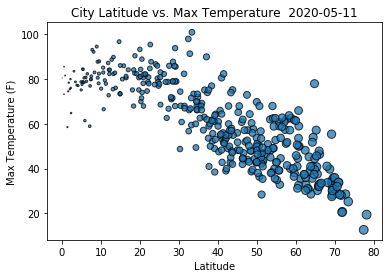

In [16]:


x_axis= cities_df["Lat"]
y_axis= cities_df["Temp_Max"]

plt.scatter( x_axis, y_axis , marker= "o", edgecolors = "black", alpha= 0.75, s= x_axis)



plt.title("City Latitude vs. Max Temperature  " + str(datetime.today())[:10]) # string para incluir la fecha
plt.ylabel("Max Temperature (F)") # Falta convertir los grados  F
plt.xlabel("Latitude")
plt.show()

Notes: Se observa a menor latitud una menor temperatura.

Se observa una relación lineal de la latitud con la temperatura

### Latitude vs. Humidity Plot

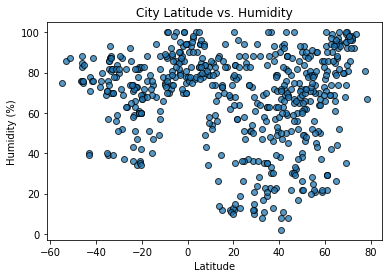

In [18]:
x_axis= cities_df["Lat"]
y_axis= cities_df["Humidity"]

plt.scatter( x_axis, y_axis , marker= "o", edgecolors = "black", alpha= 0.75,)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show()

Notes: No se observa una relación lineal de la latitud con la humedad

### Latitude vs. Cloudiness Plot

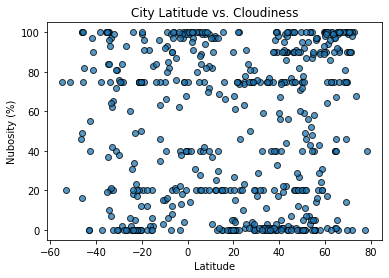

In [19]:
x_axis= cities_df["Lat"]
y_axis= cities_df["Cloudiness"]

plt.scatter( x_axis, y_axis , marker= "o", edgecolors = "black", alpha= 0.75)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Nubosity (%)")
plt.xlabel("Latitude")
plt.show()

Notes: No se observa una relación lineal de la latitud con la nubosidad

### Latitude vs. Wind Speed Plot

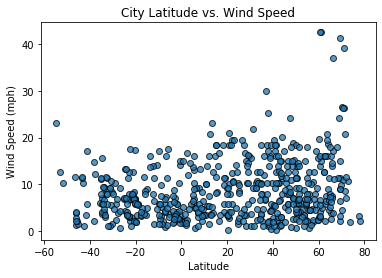

In [20]:
x_axis= cities_df["Lat"]
y_axis= cities_df["Wind_Speed"]

plt.scatter( x_axis, y_axis , marker= "o", edgecolors = "black", alpha= 0.75)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show()

Notes: No se observa una relación lineal de la latitud con la velocidad del viento

Su segundo requisito es ejecutar una regresión lineal en cada relación, solo que esta vez separándolas en el hemisferio norte (mayor o igual a 0 grados de latitud) y hemisferio sur (menor de 0 grados de latitud):

Hemisferio Norte - Temperatura (F) vs. Latitud
Hemisferio Sur - Temperatura (F) vs. Latitud
Hemisferio Norte - Humedad (%) vs. Latitud
Hemisferio Sur - Humedad (%) vs. Latitud
Hemisferio Norte - Nubosidad (%) vs. Latitud
Hemisferio Sur - Nubosidad (%) vs. Latitud
Hemisferio Norte - Velocidad del viento (mph) vs. Latitud
Hemisferio Sur - Velocidad del viento (mph) vs. Latitud

Después de cada par de gráficos, explique cuál es el modelo de regresión lineal, como las relaciones que observe y cualquier otro análisis que pueda tener.

### Linear Regression

### Create Northern Hemisphere Data Frame 

In [24]:
# Create Northern Hemisphere DataFrame
northern_df = cities_df[cities_df["Lat"]>0]
northern_df

,City,Lat,Humidity,Wind_Speed,Temp_Max,Cloudiness,Date,Lng,Country
0,praya,14.92,73.0,18.34,73.40,20.0,1589235841,-23.51,CV
3,kapaa,22.08,78.0,19.46,78.80,75.0,1589235841,-159.32,US
4,veraval,20.90,84.0,10.00,80.74,0.0,1589235792,70.37,IN
5,bonavista,48.65,75.0,18.95,38.70,82.0,1589235841,-53.11,CA
7,campbell river,50.02,40.0,5.82,69.80,75.0,1589235842,-125.24,CA
...,...,...,...,...,...,...,...,...,...
600,tombouctou,20.00,10.0,7.96,93.34,0.0,1589235943,-3.00,ML
601,dalbandin,28.89,21.0,5.75,85.87,3.0,1589235943,64.41,PK
602,sarangani,5.40,77.0,9.01,84.33,88.0,1589235943,125.46,PH
604,meadow lake,34.80,35.0,8.05,73.40,75.0,1589235944,-106.54,US


### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

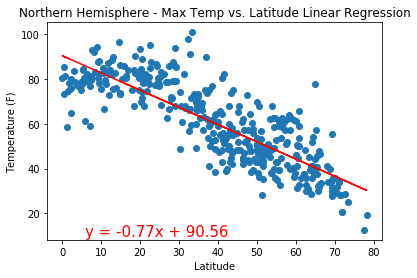

In [25]:
# Add the linear regression equation and line to plot for Hemisphere Data
x_values = northern_df["Lat"]
y_values = northern_df["Temp_Max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Add Title and labels
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.show()

In [27]:
northern_df[["Lat","Temp_Max"]].corr()

,Lat,Temp_Max
Lat,1.000000,-0.830658
Temp_Max,-0.830658,1.000000


### Note: Correlación negativa. mientras menor es la Latitud es mayor la Temperatura 

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

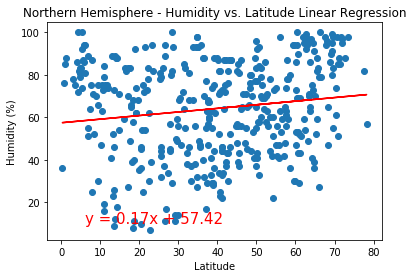

In [54]:
# Add the linear regression equation and line to plot for Hemisphere Data
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Add Title and labels
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show()

In [29]:
northern_df[["Lat","Humidity"]].corr()

,Lat,Humidity
Lat,1.000000,0.069831
Humidity,0.069831,1.000000


### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

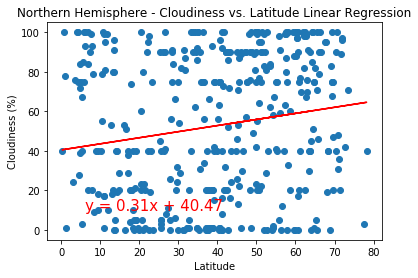

In [55]:
# Add the linear regression equation and line to plot for Hemisphere Data
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Add Title and labels
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.show()

In [30]:
northern_df[["Lat","Cloudiness"]].corr()

,Lat,Cloudiness
Lat,1.000000,0.104655
Cloudiness,0.104655,1.000000


### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

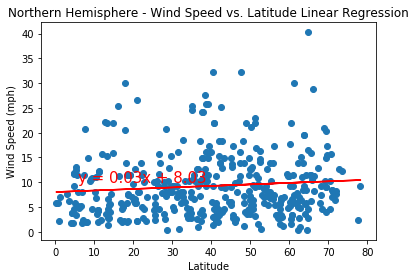

In [56]:
# Add the linear regression equation and line to plot for Hemisphere Data
x_values = northern_df["Lat"]
y_values = northern_df["Wind_Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Add Title and labels
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show()

In [31]:
northern_df[["Lat","Wind_Speed"]].corr()

,Lat,Wind_Speed
Lat,1.00000,0.15849
Wind_Speed,0.15849,1.00000


### Create Southern Hemisphere Data Frame 

In [33]:
# Create Southern Hemisphere DataFrame
southern_df = cities_df[cities_df["Lat"]<0]
southern_df

,City,Lat,Humidity,Wind_Speed,Temp_Max,Cloudiness,Date,Lng,Country
1,namibe,-15.20,47.0,9.01,78.62,83.0,1589235841,12.15,AO
2,bluff,-46.60,76.0,11.50,49.91,46.0,1589235841,168.33,NZ
6,lorengau,-2.02,70.0,4.09,85.05,97.0,1589235842,147.27,PG
13,bredasdorp,-34.53,82.0,3.67,62.60,100.0,1589235843,20.04,ZA
14,yeppoon,-23.13,63.0,8.05,64.40,5.0,1589235843,150.73,AU
...,...,...,...,...,...,...,...,...,...
585,mvuma,-19.28,72.0,5.77,51.87,91.0,1589235940,30.53,ZW
586,ariquemes,-9.91,89.0,1.48,77.97,92.0,1589235941,-63.04,BR
589,kununurra,-15.77,40.0,8.05,71.60,0.0,1589235941,128.73,AU
595,howard springs,-12.50,49.0,8.05,73.99,96.0,1589235942,131.05,AU


### Southern Hemisphere - Max Temp vs. Latitude Linear Regression### 

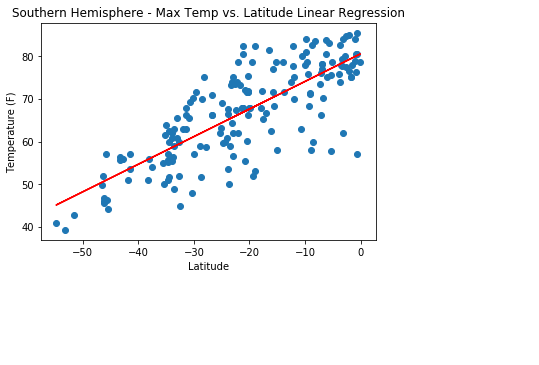

In [34]:
# Add the linear regression equation and line to plot for Hemisphere Data
x_values = southern_df["Lat"]
y_values = southern_df["Temp_Max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Add Title and labels
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.show()

In [35]:
southern_df[["Lat","Temp_Max"]].corr()

,Lat,Temp_Max
Lat,1.000000,0.785893
Temp_Max,0.785893,1.000000


### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

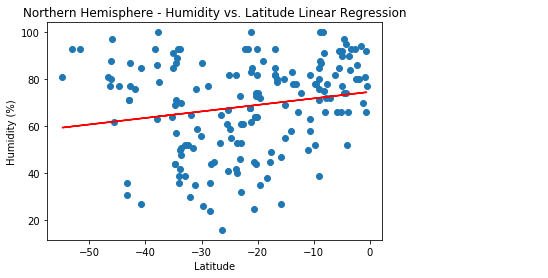

In [59]:
# Add the linear regression equation and line to plot for Hemisphere Data
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Add Title and labels
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show()

In [37]:
southern_df[["Lat","Humidity"]].corr()

,Lat,Humidity
Lat,1.000000,0.205945
Humidity,0.205945,1.000000


### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

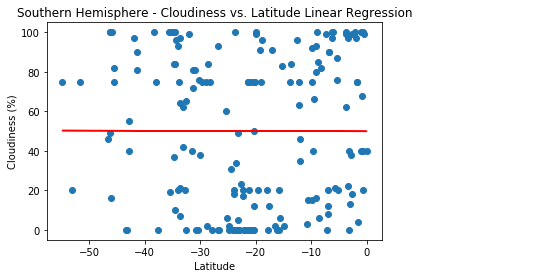

In [38]:
# Add the linear regression equation and line to plot for Hemisphere Data
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Add Title and labels
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.show()

In [37]:
southern_df[["Lat","Cloudiness"]].corr()

,Lat,Humidity
Lat,1.000000,0.205945
Humidity,0.205945,1.000000


### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression### 

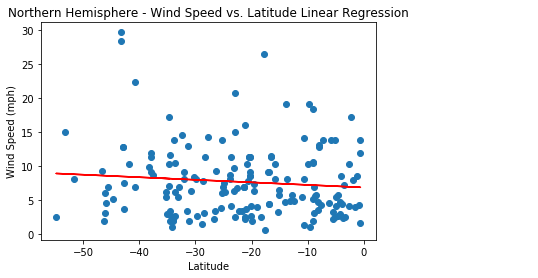

In [61]:
# Add the linear regression equation and line to plot for Hemisphere Data
x_values = southern_df["Lat"]
y_values = southern_df["Wind_Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Add Title and labels
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show()

In [39]:
southern_df[["Lat","Wind_Speed"]].corr()

,Lat,Wind_Speed
Lat,1.000000,-0.143167
Wind_Speed,-0.143167,1.000000


### OPTIONAL: Create a function to create Linear Regression plots

Opcional Creará múltiples gráficos de regresión lineal. Para optimizar su código, escriba una función que cree los gráficos de regresión lineal.

In [42]:
def plot_values(df,column1,column2,title,x_label,y_label,nombre_imagen):
    
    x_values = df[column1]
    y_values = df[column2]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")

    #Add Title and labels
    plt.title(title)
    
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    
    plt.savefig(nombre_imagen)
    
    plt.show()

In [43]:
plot_values(northern_df,"Lat","Temp_Max","titulo","ejex","ejey")

# plot_values(northern_df,"Lat","Temp_Max","titulo","ejex","ejey","imagen1.png")

TypeError: plot_values() missing 1 required positional argument: 'nombre_imagen'

### Guarde un CSV de todos los datos recuperados y una imagen PNG para cada diagrama de dispersión.

In [44]:
# Create Output File (CSV)
cities_df.to_csv("output_data/cities.csv")

In [65]:
# Crear imagen PNG de cada diagrama




### Para la Parte I, debe incluir una descripción escrita de tres tendencias observables basadas en los datos.